### Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
#bring in both the train and test data sets
os.chdir('../')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [5]:
#save some data from the two data sets
sale_price = train['SalePrice']
train_index = pd.DataFrame(train.index)
test_index = pd.DataFrame(test.index)
train_id = pd.DataFrame(train['Id'])
test_id = pd.DataFrame(test['Id'])

### Getting to know the data

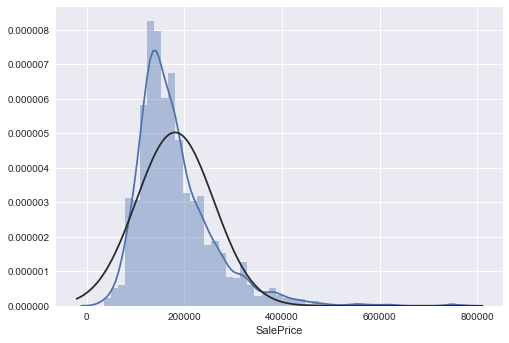

In [6]:
sns.distplot(sale_price,fit=stats.norm)

The SalePrice column is our target variable, and it appears to be positively skewed

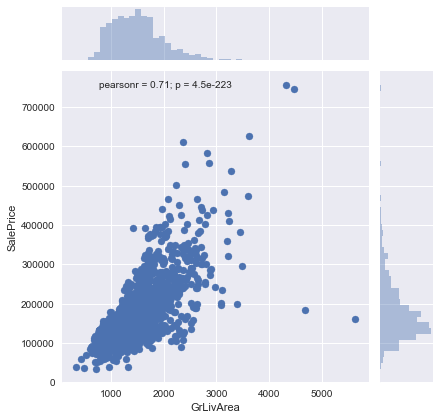

In [7]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=train)

******** use other charts

### Cleaning the Data

In [6]:
#combine the two data sets for cleaning
all_data = pd.concat([train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']])

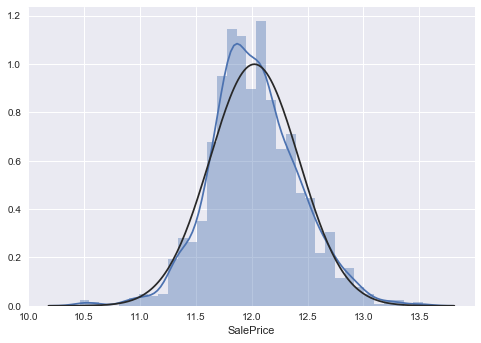

In [7]:
#normalize the SalePrice column
sale_price = np.log1p(sale_price)
sns.distplot(sale_price,fit=stats.norm) #check to make sure it is now approximately normal

In [8]:
all_data.isnull().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
dtype: int64

It looks like we have 34 columns with at least 1 null value.

In [9]:
#save a copy of the data in case of errors below
all_data_backup = all_data

In [10]:
#Convert the MSSubClass to a string, not really a numeric field and a ML algo will misinterpret if numeric
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [11]:
#Fill in the numeric column nulls with zeros 
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageCars'].fillna(0,inplace=True)
all_data['BsmtFinSF1'].fillna(0,inplace=True)
all_data['BsmtFinSF2'].fillna(0,inplace=True)
all_data['BsmtUnfSF'].fillna(0,inplace=True)
all_data['TotalBsmtSF'].fillna(0,inplace=True)
all_data['BsmtFullBath'].fillna(0,inplace=True)
all_data['BsmtHalfBath'].fillna(0,inplace=True)
all_data['MasVnrArea'].fillna(0,inplace=True)

In [12]:
#Map over the quality categories to numeric values.  Kudos to source 2 for this idea
qual_dict = {None: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
all_data['ExterQual'] = all_data['ExterQual'].map(qual_dict).astype(int)
all_data['ExterCond'] = all_data['ExterCond'].map(qual_dict).astype(int)
all_data['FireplaceQu'] = all_data['FireplaceQu'].map(qual_dict).astype(int)
all_data['BsmtQual'] = all_data['BsmtQual'].map(qual_dict).astype(int)
all_data['BsmtCond'] = all_data['BsmtCond'].map(qual_dict).astype(int)
all_data['GarageQual'] = all_data['GarageQual'].map(qual_dict).astype(int)
all_data['GarageCond'] = all_data['GarageCond'].map(qual_dict).astype(int)
all_data['HeatingQC'] = all_data['HeatingQC'].map(qual_dict).astype(int)
all_data['KitchenQual'] = all_data['KitchenQual'].map(qual_dict).astype(int)
all_data['PoolQC'] = all_data['PoolQC'].map(qual_dict).astype(int)

In [13]:
#fill in the nulls for GarageType and GarageFinish, then drop GarageYrBlt since there isn't a great way to impute
all_data['GarageType'].fillna('None',inplace=True)
all_data['GarageFinish'].fillna('None',inplace=True)
all_data.drop('GarageYrBlt',inplace=True,axis=1)

#fill in missing values for Alley
all_data['Alley'].fillna('None',inplace=True)

#somewhat arbitrary assigment to fence
all_data['Fence'] = all_data['Fence'].map({None: 0, 'MnWw': 1, 'MnPrv': 2, 'GdWo': 3, 'GdPrv': 4}).astype(int)

#setting the Misc Feature to a 1 or 0
all_data['MiscFeature'] = all_data['MiscFeature'].map({None: 0, 'Shed': 1, 'Gar2': 1, 'Othr': 1, 'TenC': 1, 'Elev': 1}).astype(int)

In [14]:
#the house with a null Electrical was built 2006, so I will impute the standard circuit breaker value
all_data['Electrical'].fillna('SBrkr',inplace=True)

#the houses that have a null Utilities are built in 1910 and 1952, so they might legitimately have fewer Utilities
#I am going to impute the NoSeWa value for these two
all_data['Utilities'].fillna('NoSeWa',inplace=True)

#Functional is tricky.  I looked at the various other attributes of the two with missing values
#and inserted what I thought was appropriate
all_data['Functional'].fillna('Sev',inplace=True)

#inserting None in MasVnrType since that is most common and a null value seems to indicate none
all_data['MasVnrType'].fillna('None',inplace=True)

In [15]:
#Imputing the median value of lot frontage for a home given its neighborhood.  Major kudos to source 2
lot_frontage_by_neighborhood = all_data['LotFrontage'].groupby(all_data['Neighborhood'])
for key, value in lot_frontage_by_neighborhood:
    index = (all_data['Neighborhood'] == key) & (all_data['LotFrontage'].isnull())
    all_data.loc[index, 'LotFrontage'] = value.median()

In [16]:
#this is only a guess based on the most common values of these columns, only affects 1 record
all_data['Exterior1st'].fillna('VinylSd',inplace=True)
all_data['Exterior2nd'].fillna('VinylSd',inplace=True)

#also a guess based on most common value of this column, only affects 1 record
all_data['SaleType'].fillna('WD',inplace=True)

In [17]:
#insert arbitrary None value for nulls, since these houses apparently do not have basements
all_data['BsmtExposure'].fillna('None',inplace=True)
all_data['BsmtFinType1'].fillna('None',inplace=True)
all_data['BsmtFinType2'].fillna('None',inplace=True)

In [18]:
#insert what my best guess for the zoning is based on the neighborhood and the most common values respectively
all_data.loc[455,'MSZoning'] = 'RM'
all_data.loc[756,'MSZoning'] = 'RM'
all_data.loc[790,'MSZoning'] = 'RM'
all_data.loc[1444,'MSZoning'] = 'RL'

In [19]:
#looks like we have the nulls cleaned up
all_data.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

In [20]:
all_data.shape

(2919, 78)

In [21]:
#find the numerical features and see which of those are skeweed
numeric_features = all_data.dtypes[all_data.dtypes != object].index

In [22]:
skewed = all_data[numeric_features].apply(lambda x: stats.skew(x))
skewed = skewed[abs(skewed)>1]
skewed_features = skewed.index

In [23]:
#these are the columns from skewed_features that are not essentially categorical (e.g. not a 0-5 quality scale)
skewed_noncat_features = ['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

all_data[skewed_noncat_features] = all_data[skewed_noncat_features].apply(lambda x: np.log1p(x))

In [25]:
train.shape[0]

1460

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,0,0,0,0,2,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,0.000000,0.0,0,0,0,0,5,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,0,0,0,0,9,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,0.000000,0.0,0,0,0,0,12,2008,WD,Normal
5,50,RL,4.454347,9.555064,Pave,None,IR1,Lvl,AllPub,Inside,...,0.000000,0.0,0,2,1,700,10,2009,WD,Normal
6,20,RL,4.330733,9.218804,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,0,0,0,0,8,2007,WD,Normal
7,60,RL,4.394449,9.247925,Pave,None,IR1,Lvl,AllPub,Corner,...,0.000000,0.0,0,0,1,350,11,2009,WD,Normal
8,50,RM,3.951244,8.719481,Pave,None,Reg,Lvl,AllPub,Inside,...,0.000000,0.0,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,3.931826,8.912069,Pave,None,Reg,Lvl,AllPub,Corner,...,0.000000,0.0,0,0,0,0,1,2008,WD,Normal
